# EDA on Heart Dataset

### Goals For EDA
- know the high level of data shape, info, desc
- understand all columns meaning
## (Univariate)
- see the distribution of numerical columns without and with bases of other categorical columns
- see the counts of categorical columns
## (BiVariate)
- Find the relation between two columns
- find the correlation

### Importing Necessary Dependencies

In [2]:
import numpy as np        
import pandas as pd               
import seaborn as sns               
import matplotlib.pyplot as plt             

### Loading Data as DataFrame

In [3]:
df = pd.read_csv('data/heart.csv')

### Accessing top 5 rows

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Staring High Level Analysis

### Finding out the shape of the data 

In [5]:
df.shape

(918, 12)

### Observing the Data Types of Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Observing Statistics of Numerical Columns

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Checking For Any Missing Values

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- There is no missing values 

### Checking for any duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

there is no duplicates

# (Univariate) - Analysis

### Visualizing the distribution of age based on sex and heart disease

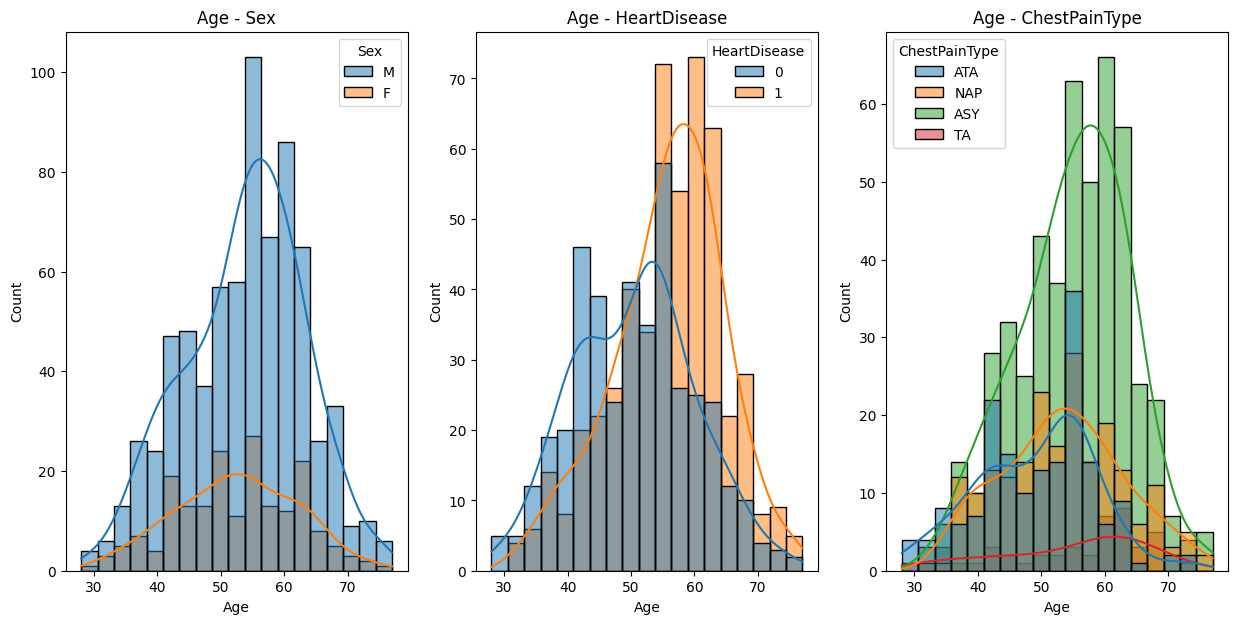

In [20]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data=df, x='Age', kde=True, hue='Sex')
plt.title('Age - Sex')

plt.subplot(1,3,2)
sns.histplot(data=df, x='Age', kde=True, hue='HeartDisease')
plt.title('Age - HeartDisease')

plt.subplot(1,3,3)
sns.histplot(data=df, x='Age', kde=True, hue='ChestPainType')
plt.title('Age - ChestPainType')
plt.show()

### Insights
- Large scale of Males range of 58 to 60 age group
- Female range about 50 to 53 age group
- Most of the Heart Patients age range about 58 to 60
- ASY ChestPainType causes more Heart Attacks (Immediate Action Required)

### Visualizing Cholestrol Distribution based on Sex, ChestPainTypea and RestingECG

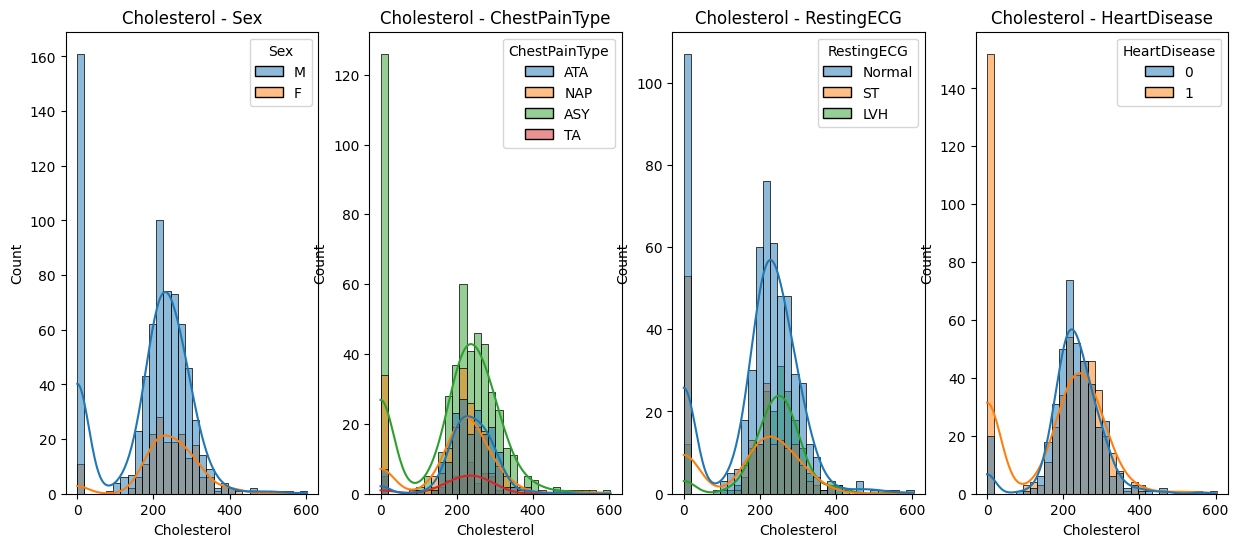

In [23]:
plt.figure(figsize=(15, 6))
plt.subplot(1,4,1)
sns.histplot(data=df, x='Cholesterol', kde=True, hue='Sex')
plt.title('Cholesterol - Sex')

plt.subplot(1,4,2)
sns.histplot(data=df, x='Cholesterol', kde=True, hue='ChestPainType')
plt.title('Cholesterol - ChestPainType')

plt.subplot(1,4,3)
sns.histplot(data=df, x='Cholesterol', kde=True, hue='RestingECG')
plt.title('Cholesterol - RestingECG')

plt.subplot(1,4,4)
sns.histplot(data=df, x='Cholesterol', kde=True, hue='HeartDisease')
plt.title('Cholesterol - HeartDisease')
plt.show()

### Insights
- Most of the Males have cholesterol of around 250 and Females have 230
- ASY ChestPainType people have 240 to 250 cholesterol
- Normal RestingECG people have almost 210 to 230 level of cholesterol
- People with heart disease have 250 tp 270 cholesterol

### Visualizing the distribution of Age for Only Males And Female with respect to HeartDisease

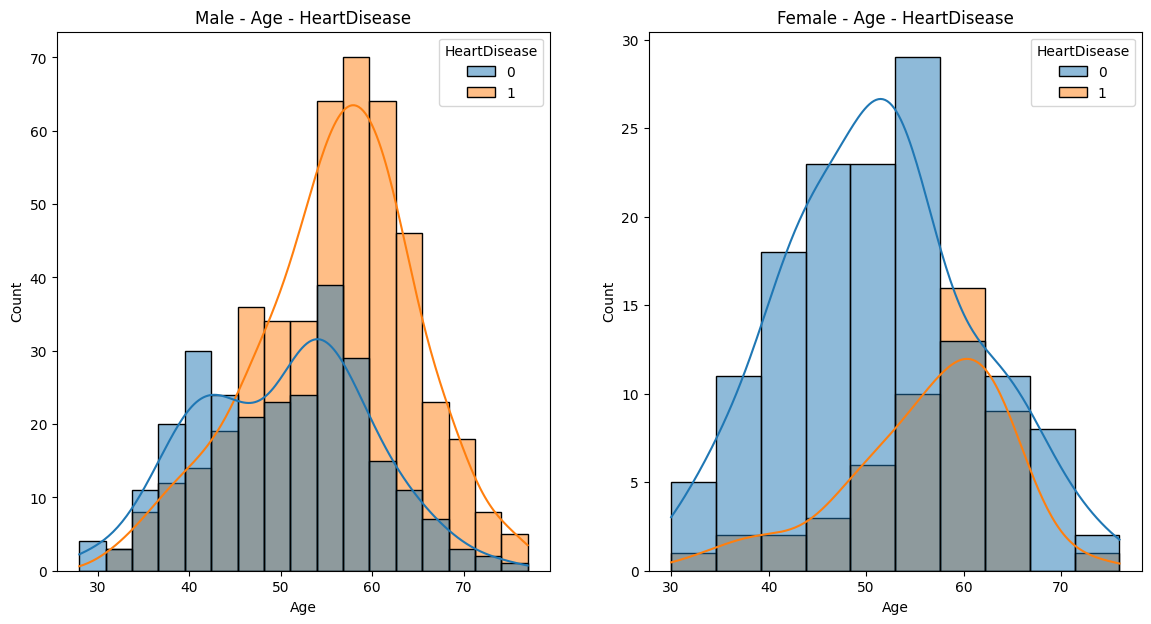

In [24]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.histplot(data=df[df.Sex == 'M'], x='Age', kde=True, hue='HeartDisease')
plt.title('Male - Age - HeartDisease')

plt.subplot(1,2,2)
sns.histplot(data=df[df.Sex == 'F'], x='Age', kde=True, hue='HeartDisease')
plt.title('Female - Age - HeartDisease')
plt.show()

### Insights
#### Males:
- Males with Heart Disease have Age group of 57 to 60
- Males with No Disease have Age group of 52 to 56

#### Female:
- Females with Heart Disease have Age group of 58 to 65
- Females with no Disease have 38 to 55 Age

### Finding the count of Males and Females

<Axes: xlabel='Sex', ylabel='count'>

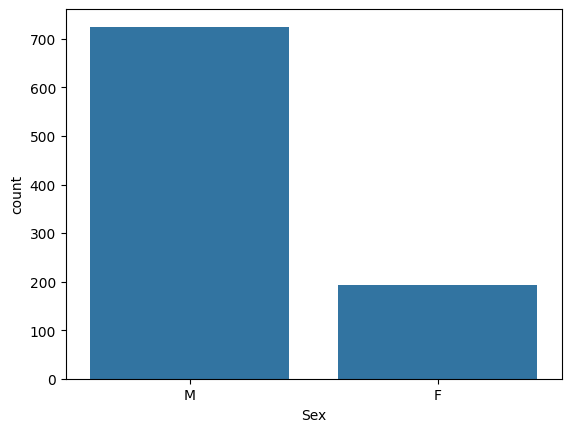

In [26]:
sns.countplot(data=df, x='Sex')

### Insights
- The Survey have most Males rather than Females 

### Visualizing the count of Males and Females who have Heart Disease

<Axes: xlabel='Sex', ylabel='count'>

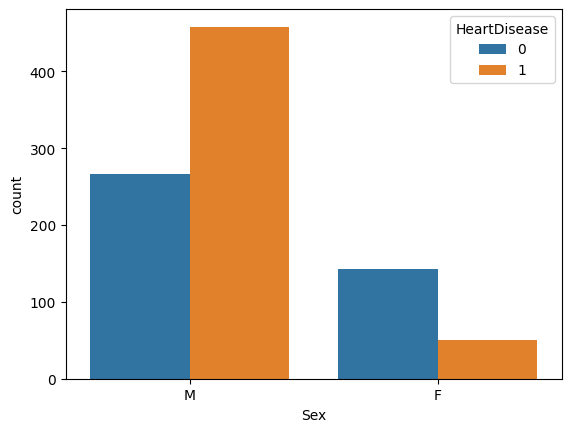

In [27]:
sns.countplot(data=df, x='Sex', hue='HeartDisease')

### Insights
- In the survey the Most of the Heart Disease occurs to Male
- Females Heart Disease rate is lesser

### Visulizing the ChestPainType count base on Heart Disease

<Axes: xlabel='ChestPainType', ylabel='count'>

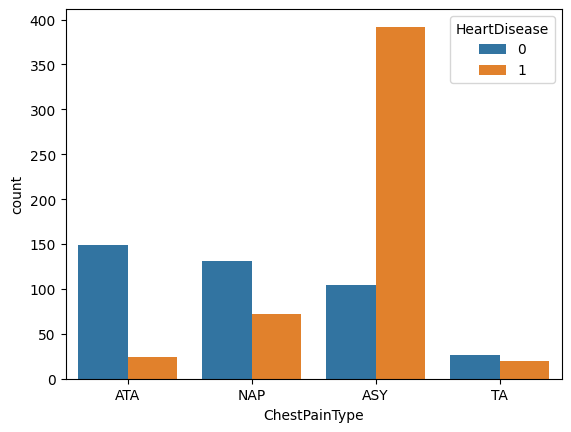

In [29]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')

### Insights
- ATA Chest Pain people have lesser chance of Heart Disease
- NAP Chest Pain Type pople have 50% chances of getting Heart Disease
- ASY Chest Pain Type people have 20% chances of not getting Heart Disease means this type will occur more heart attacks.
- TA is Rare but this Pain Type will also have great chance to get Heart Attack

### Visualizing the Most people with Most Age Range

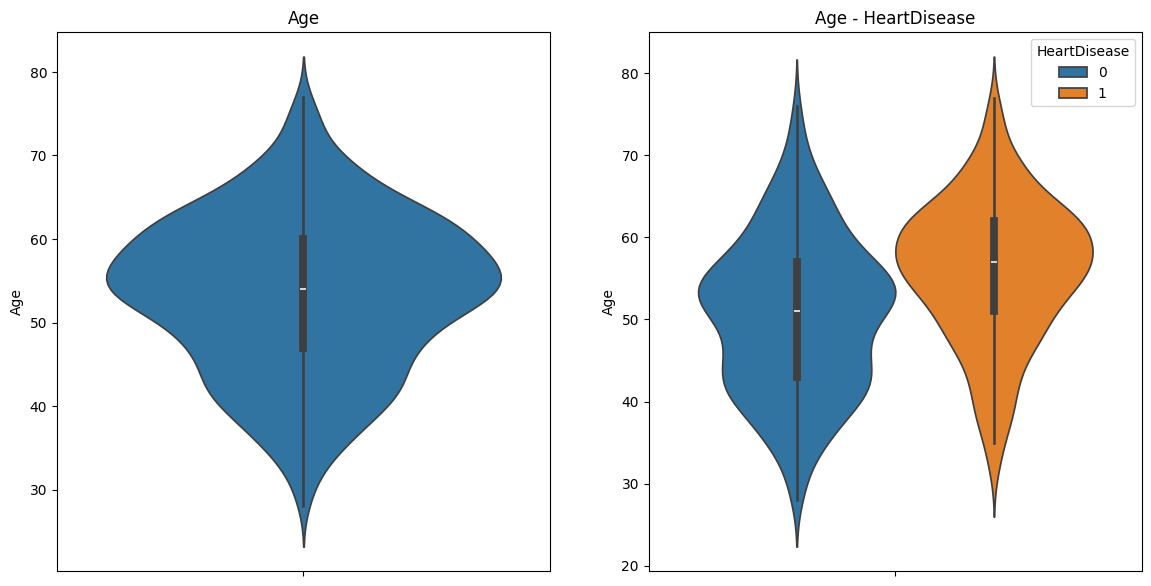

In [32]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.violinplot(data=df, y='Age')
plt.title('Age')

plt.subplot(1,2,2)
sns.violinplot(data=df, y='Age', hue='HeartDisease')
plt.title('Age - HeartDisease')
plt.show()

### Insights
- Most of the peoples ranges between 52 to 63
- Most of the peoples with Heart Disease range between 55 to 65
- Most of the peoples with no Heart Disease range between 40 to 55

### Visualizing the total count of Heart Disease patients and non Disease Patients

<Axes: xlabel='HeartDisease', ylabel='count'>

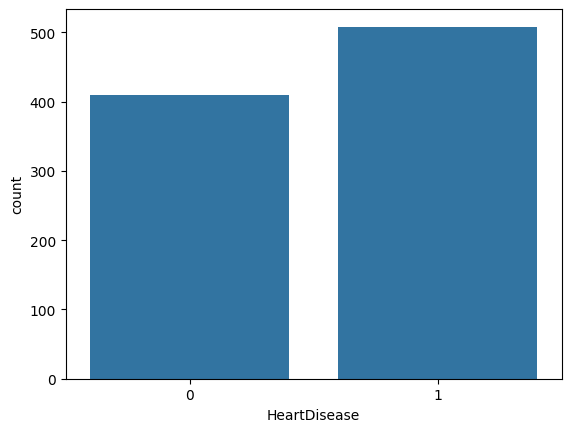

In [36]:
sns.countplot(data=df, x='HeartDisease')

### Insights
- The Survey have Heart patients and no Heart patients

# (Bivariate - Analysis)

### Visualzing Correlation of Data

<Axes: >

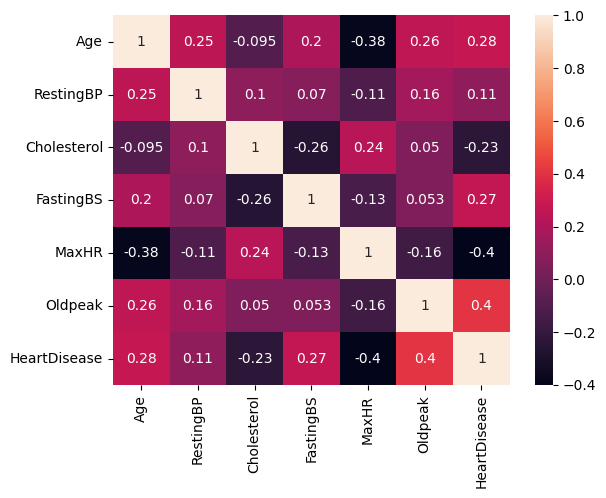

In [34]:
sns.heatmap(df[df.select_dtypes('number').columns].corr(), annot=True)

### Insights
- Age and FastingBS have some good amount of Correlation to HeartDisease

### Visualizing the PairPlot

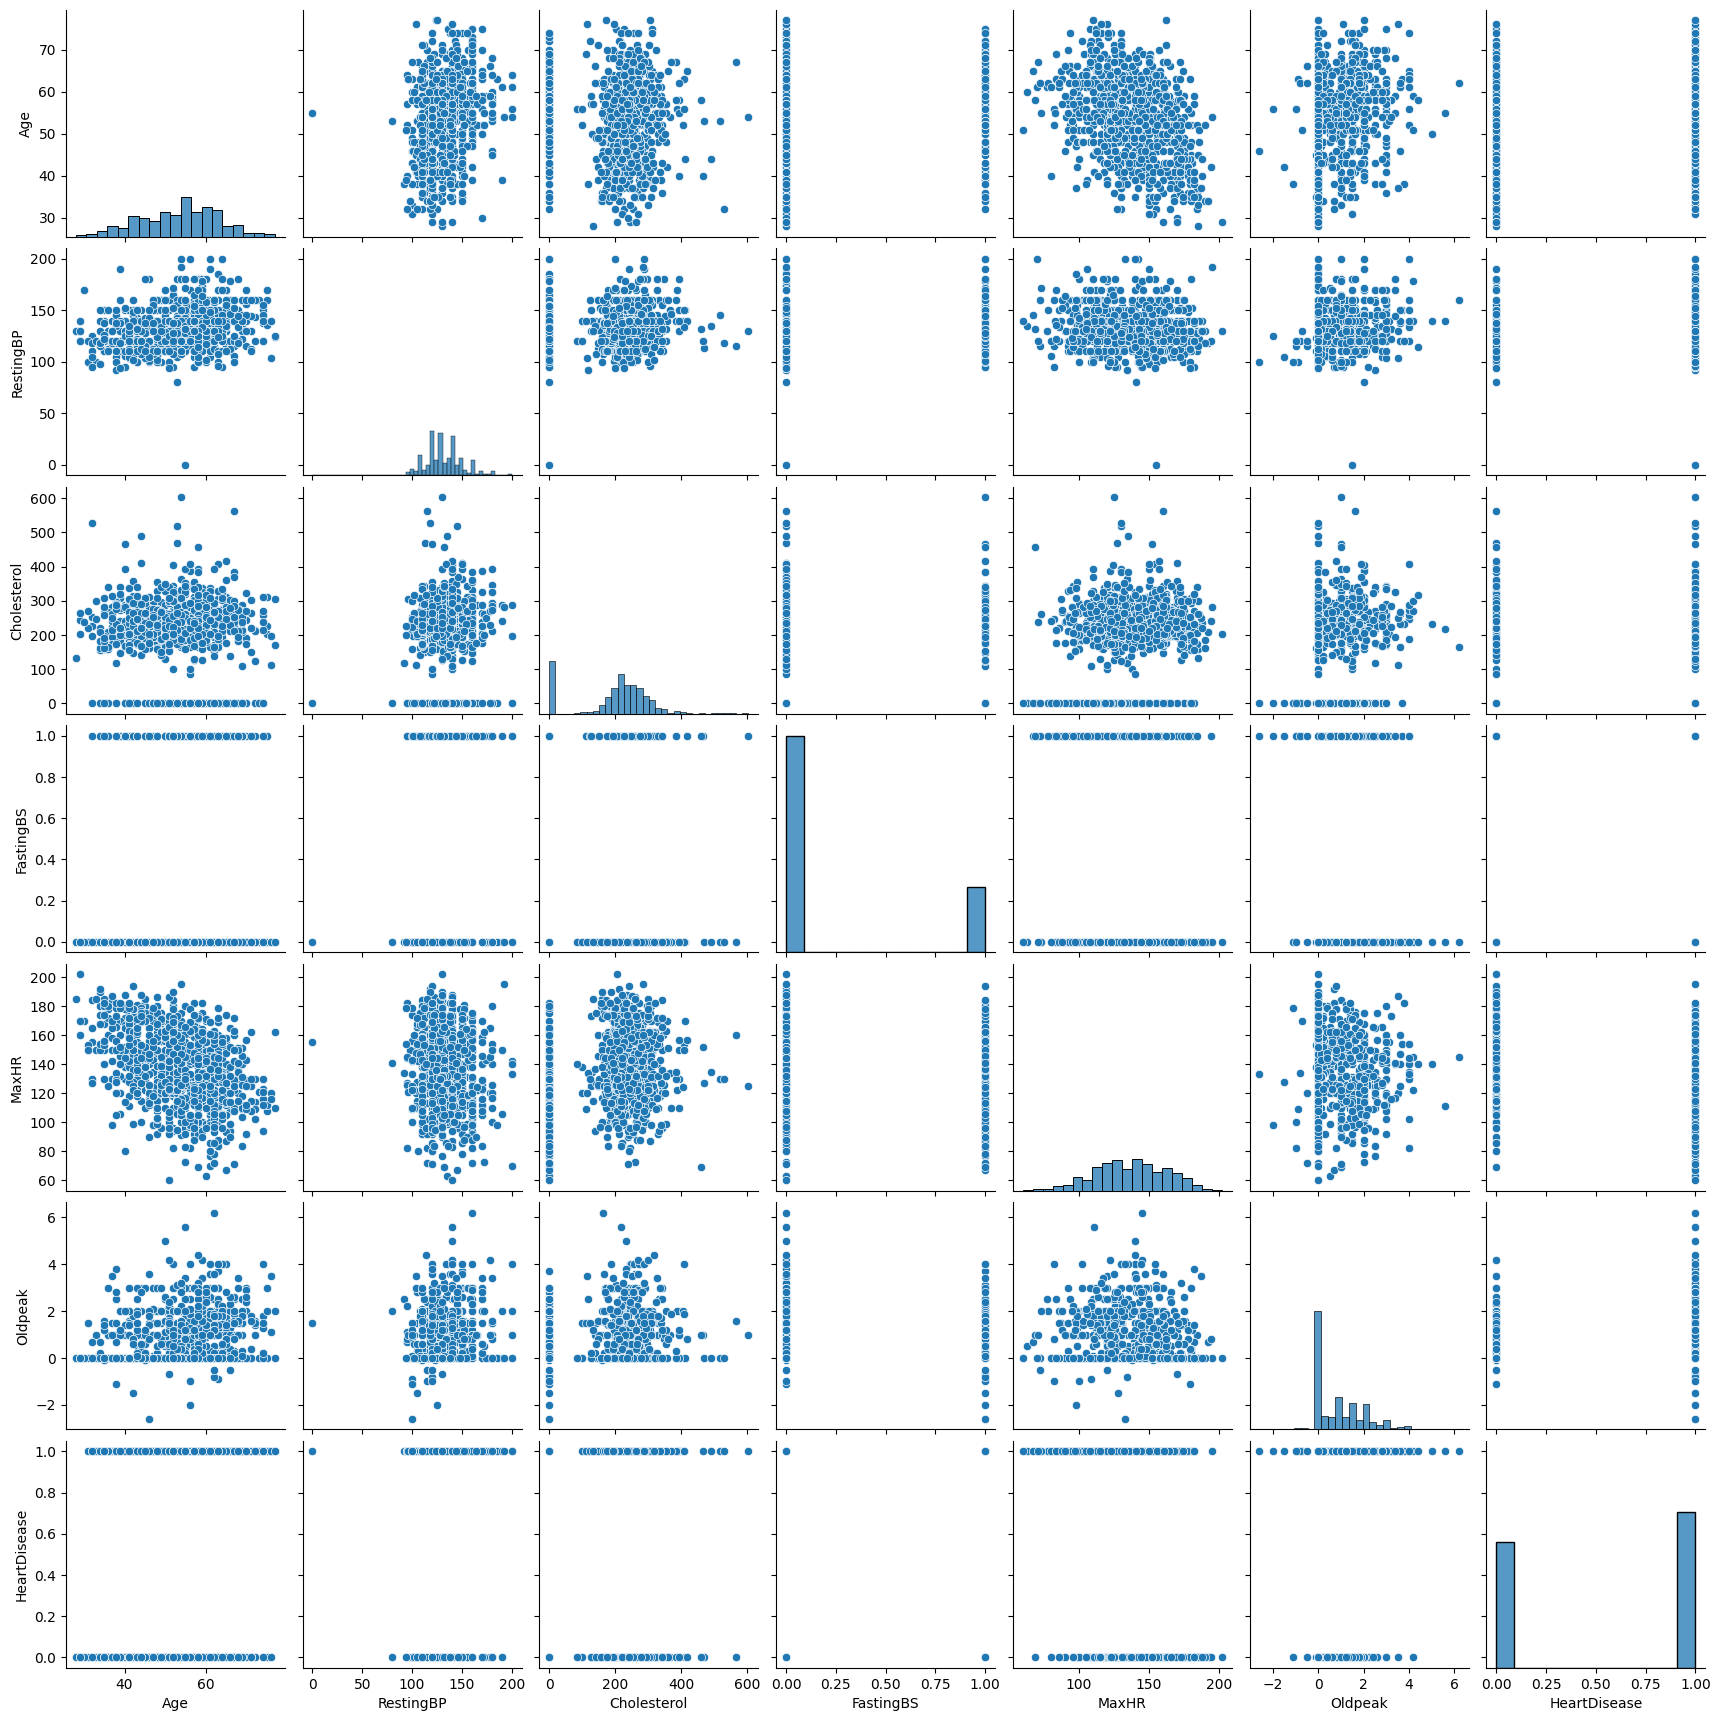

In [35]:
sns.pairplot(df)

### Visualizig the boxplot of ChestPainType based on Cholesterol

<Axes: xlabel='ChestPainType', ylabel='Cholesterol'>

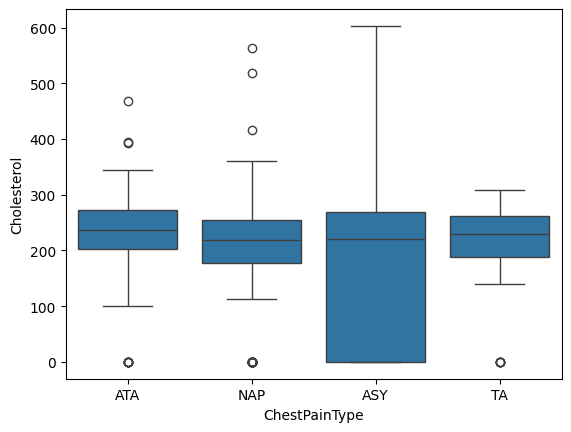

In [39]:
sns.boxplot(data=df, x='ChestPainType', y='Cholesterol')

### Insights
- ASY have most of the cholesterol range between 230

### Visualizig the boxplot of ChestPainType based on Age

<Axes: xlabel='ChestPainType', ylabel='Age'>

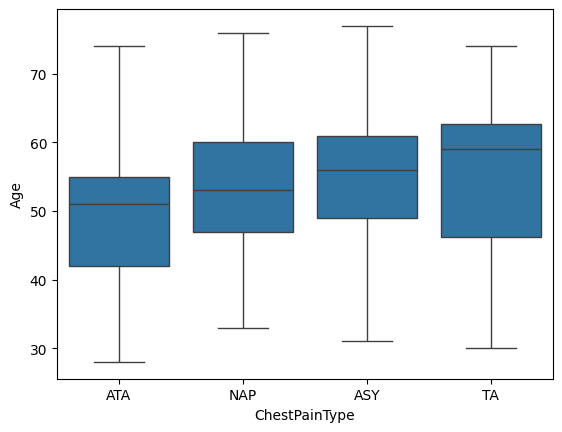

In [41]:
sns.boxplot(data=df, x='ChestPainType', y='Age')

### Visualizing BP distribution based on different ChestPainType

<Axes: xlabel='ChestPainType', ylabel='RestingBP'>

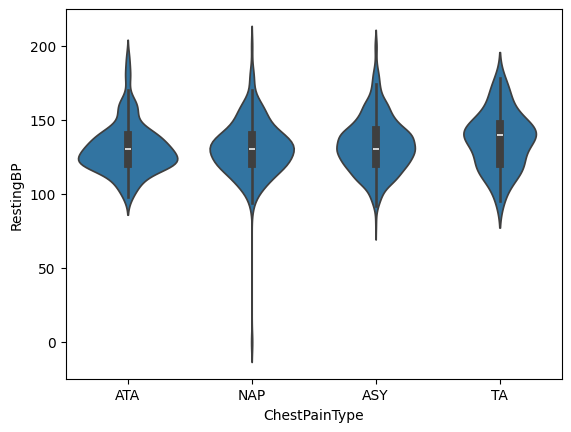

In [42]:
sns.violinplot(data=df, x='ChestPainType', y='RestingBP')

### Insights
- most of the people from different ChestPainType have BP range between 100 to 150

### Visualizing the Realtionship between Age and Cholesterol

<Axes: xlabel='Age', ylabel='Cholesterol'>

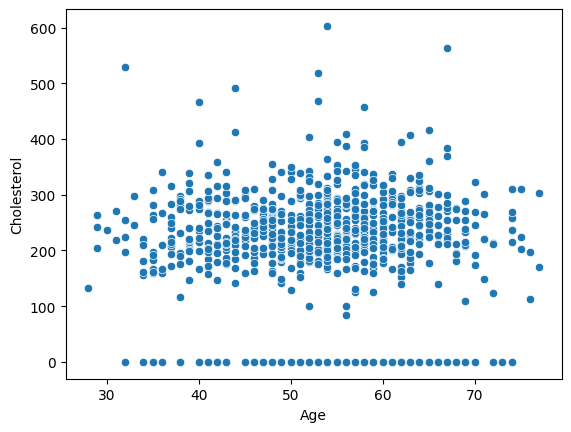

In [44]:
sns.scatterplot(data=df, x='Age', y='Cholesterol')

### I have completed most of the EDA and understand the data very well
## Next Steps:
- show a demo of Data Science Workflow
- Build Whole workflow with modular coding